## Chess Project

# Table of Contents<span class="tocSkip"></span>
<div class="toc"><ul class="toc-item"><li><span><a href="#About the Dataset" data-toc-modified-id="About the Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About the Dataset</a></span></li><li><span><a href="#Data Visualization" data-toc-modified-id="Data Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Data Preparation and Preprocessing" data-toc-modified-id="Data Preparation and Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation and Preprocessing</a></span></li><li><span><a href="#Model Planning" data-toc-modified-id="Model Planning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Planning</a></span></li><li><span><a href="#Training models" data-toc-modified-id="Training models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training models</a></span></li><li><span><a href="#Model Selection" data-toc-modified-id="Model Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Final Model Results" data-toc-modified-id="Final Model Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Model Results</a></span></li></ul></div>


## About the Dataset


This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

- Game ID




- Rated (T/F)




- Start Time


- End Time


- Number of Turns


- Game Status


- Winner


- Time Increment


- White Player ID


- White Player Rating


- Black Player ID


- Black Player Rating


- All Moves in Standard Chess Notation


- Opening Eco (Standardised Code for any given opening, list here)


- Opening Name


Opening Ply (Number of moves in the opening phase)
For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

## Data Visualization

In [2270]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2271]:
# Importing the dataset

df = pd.read_csv('games.csv')
display(df.head(4))

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3


In [2272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


We notice that we don't have any missing values

In [2273]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


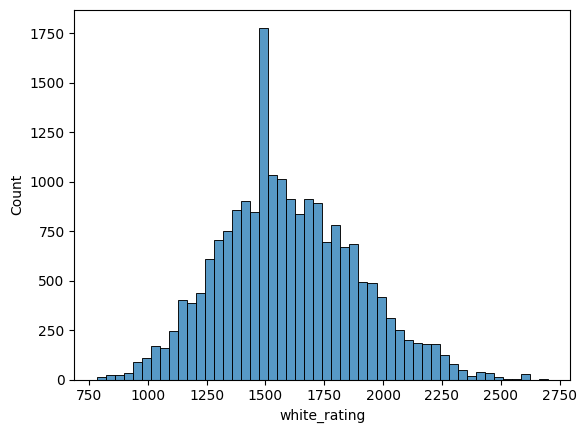

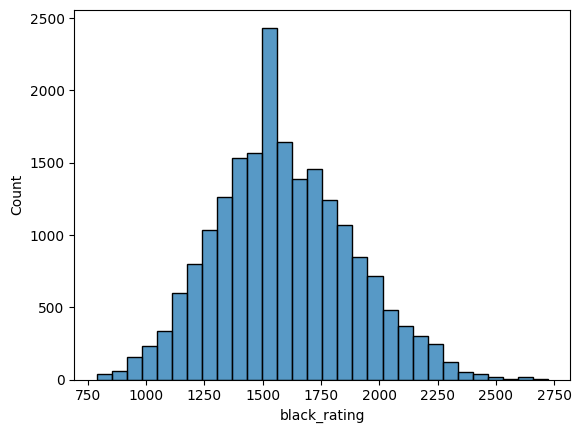

In [2274]:
plt.figure()
sns.histplot(x='white_rating', bins= 50 ,data=df);
plt.show()
plt.figure()
sns.histplot(x='black_rating', bins= 30 ,data=df);
plt.show()

## Data Preparation and Preprocessing

In [2275]:
# We notice that white_id, black_id and the id columns give no information, so we drop them
df.drop(['id', 'white_id', 'black_id'], axis=1, inplace=True)

In [2276]:
# Previewing dataset columns lenghts to see who should be splitted in multiple columns

for col in df.columns:
    print(f"{col} length: {len(df[col].unique())}")

rated length: 2
created_at length: 13151
last_move_at length: 13186
turns length: 211
victory_status length: 4
winner length: 3
increment_code length: 400
white_rating length: 1516
black_rating length: 1521
moves length: 18920
opening_eco length: 365
opening_name length: 1477
opening_ply length: 23


In [2277]:
# perform label encoding on boolen column
df['rated'] = df['rated'].astype(int)

# Perform One Hot Encoding on categorical columns with less than 5 unique values
# df = pd.get_dummies(df, columns=['victory_status'],drop_first=False)

#perform custom encoding on winner and victory status columns
df['winner'] = df['winner'].map({'white':1,'black':0,'draw':2})
df['victory_status']=df['victory_status'].map({'resign':0, 'mate':1, 'draw':2, 'outoftime':3})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  int32  
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  int64  
 5   winner          20058 non-null  int64  
 6   increment_code  20058 non-null  object 
 7   white_rating    20058 non-null  int64  
 8   black_rating    20058 non-null  int64  
 9   moves           20058 non-null  object 
 10  opening_eco     20058 non-null  object 
 11  opening_name    20058 non-null  object 
 12  opening_ply     20058 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 1.9+ MB


In [2278]:

# Convert new colmuns  from uint8 to int
# columns = ['victory_status_draw', 'victory_status_mate',
#     'victory_status_outoftime', 'victory_status_resign']

# df.loc[:, columns] = df.loc[:, columns].astype(int)
# df.info()


In [2279]:
# Previewing the moves stats to get a sense of the data
import math
df['moves'].apply(lambda x: math.ceil(len(x.split(' '))/2)).describe()

count    20058.000000
mean        30.490278
std         16.782955
min          1.000000
25%         19.000000
50%         28.000000
75%         40.000000
max        175.000000
Name: moves, dtype: float64

In [2280]:
# Now we are going to add a new column with the number of moves in each game
df['moves_num'] = df['moves'].apply(lambda x: math.ceil(len(x.split(' '))/2))


In [2281]:
# The max number of moves in proffinal chess is less than 150, so we drop all outliers games
Q1 = df['moves_num'].quantile(q=0.25) 
Q3 = df['moves_num'].quantile(q=0.75)

IQR = Q3 - Q1

df.drop(df[df['moves_num'] >= Q3 + 1.5*IQR].index, inplace=True)

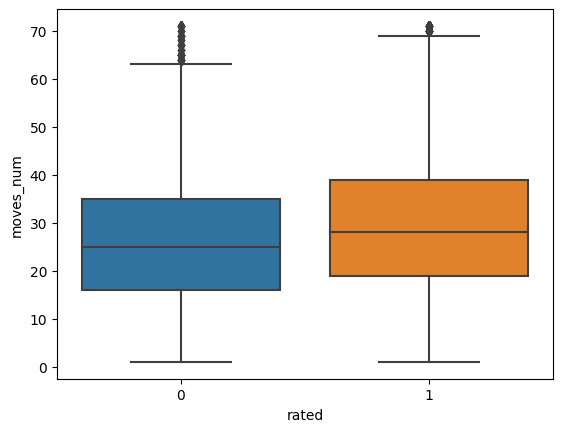

In [2282]:
# Ploting box plot after deleting outliers
plt.figure()
sns.boxplot(y='moves_num',x='rated',data=df);
plt.show()

In [2283]:
# We notice that still  there are some noisy in the data especially the lower wisker of the boxplot (there are many games with 1 moves)
# In chess the minimum number of moves to win a game is 2 moves (Fool's mate) so we will remove all the games with less than 2 moves

OneMove_games = df.drop(df[df['moves_num'] < 8].index, inplace=True)

In [2284]:
df['moves_num'].describe()

count    18593.000000
mean        30.795084
std         14.228139
min          8.000000
25%         20.000000
50%         28.000000
75%         39.000000
max         71.000000
Name: moves_num, dtype: float64

In [2285]:
# We are going to create a new column called period which is the difference between the last move and the creation of the account
df['period'] = df['last_move_at'] - df['created_at']
df['period'].describe() 

count    1.859300e+04
mean     8.812592e+05
std      4.903121e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.863800e+05
75%      8.052810e+05
max      6.058447e+08
Name: period, dtype: float64

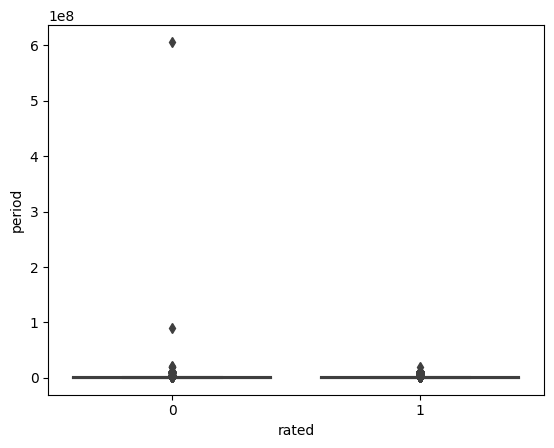

In [2286]:
# Ploting box plot for period
plt.figure()
sns.boxplot(y = 'period', x = 'rated', data = df)
plt.show()

In [2287]:
# Drop the 'created_at' and 'last_move_at' columns because they are not useful for our analysis and they are given in the wrong format.
times_columns = df.drop(['created_at', 'last_move_at', 'period'], axis=1, inplace=True)

In [2288]:
# The increment_code columns represents ..., so we convert it to a better format by taking the number before the + sign
df['increment_code'] = df['increment_code'].str.split('+').str[0].astype(int)
# not a good idea to do this, because it will make the data skewed
#df['increment_code'] = df['increment_code'].apply(lambda x: 1 if x > 0 else 0)
#df['increment_code'] 

In [2289]:
df["increment_code"].value_counts()

increment_code
10     8854
15     3144
5      1641
20      870
8       863
30      699
7       617
25      294
9       237
12      216
6       155
45      149
180     108
11       89
60       86
13       65
14       64
4        59
3        53
2        51
16       43
17       37
40       30
1        30
0        29
90       24
18       23
35       23
19       21
120       9
150       7
29        2
21        1
Name: count, dtype: int64

Here we are going to preprocess the moves column and convert it into a better format.


In [2290]:
def create_2elementsList(array):
    # initialize an empty list for the new array
    new = []
    # loop through the original array with a step of 2
    for i in range(0, len(array), 2):
        # append the two elements as a sub-list to the new array
        new.append(array[i:i+2])
    return new

In [2291]:
# Converting the elements of moves column form a sting if moves to a list
df['moves'] = df['moves'].apply(lambda x: create_2elementsList(x.split()))

In [2292]:
# Creating an Opening Column where we store the moves taken at the begining if the game using the opening_ply column
df['opening_num'] = df.apply(lambda row: len(row["moves"][:int(row["opening_ply"])]), axis=1)
df.loc[4, 'opening_num']


5

In [2293]:
# Creating a last_moves column where we store the last two moves of each game
df['last_moves_num'] = df['moves'].apply(lambda x: len(x[-2]))
df.loc[4, 'last_moves_num']

2

In [2294]:
# Creating a column for the number of mid-game moves between the opening and last moves
df['midMoves_num'] = df['moves_num'] - 2- df['opening_ply']
df['midMoves_num']

1         2
2        26
3        26
4        41
6         5
         ..
20053     8
20054    37
20055    13
20056    49
20057    34
Name: midMoves_num, Length: 18593, dtype: int64

In [2295]:
# Preprocessing the opening_name column
df['opening_name'] = df['opening_name'].apply(lambda x: x.split(':')[0].split('|')[0].split('#')[0])

In [2296]:
(df['opening_name'].unique())

array(['Nimzowitsch Defense', "King's Pawn Game", "Queen's Pawn Game",
       'Philidor Defense', 'Blackmar-Diemer Gambit', 'Italian Game',
       'Scandinavian Defense', "Van't Kruijs Opening", 'French Defense',
       'French Defense ', 'Four Knights Game', 'Philidor Defense ',
       'Sicilian Defense', 'English Opening', 'Scotch Game',
       'Slav Defense', "Queen's Gambit Refused",
       "Queen's Gambit Accepted", 'Robatsch (Modern) Defense',
       'Indian Game', 'Dutch Defense', 'Vienna Game', 'Modern Defense',
       'Horwitz Defense', 'Blumenfeld Countergambit ',
       'Zukertort Opening', "Queen's Pawn", 'Crab Opening',
       "Queen's Indian Defense", 'Gruenfeld Defense',
       "Queen's Gambit Declined", 'Yusupov-Rubinstein System',
       'Ruy Lopez', "Bishop's Opening", 'Benoni Defense',
       "King's Indian Attack", 'Alekhine Defense ', 'Alekhine Defense',
       'Caro-Kann Defense', 'Goldsmith Defense', 'Nimzo-Indian Defense',
       'Bogo-Indian Defense', 'Amar Ope

In [2297]:
# We going to  deop the opening name  columns because generate a lot of dimnesionality due to high number of unique values
df.drop(['opening_name'], axis=1, inplace=True)

In [2298]:
# Now we are going to drop the opening_ply column because it become useless for our analysis
df.drop(['opening_ply'], axis=1, inplace=True)

In [2299]:
# We going to drop the opening_eco column because it is not useful for our analysis
df.drop(['opening_eco'], axis=1, inplace=True)

In [2300]:
df.drop(['turns'], axis=1, inplace=True)

In [2301]:
df.drop(['moves'], axis = 1, inplace = True)

In [2302]:
df['winner'].value_counts()
#df.drop(['rated'], axis=1,inplace=True)

winner
1    9287
0    8506
2     800
Name: count, dtype: int64

In [2303]:
# Previewing dataset after cleaning so far
display(df.head())
display(df.info())
display(df.describe())
#df.drop(['increment_code'],axis=1,inplace=True)
#df.drop(['last_moves_num'],axis=1,inplace=True)

,rated,victory_status,winner,increment_code,white_rating,black_rating,moves_num,opening_num,last_moves_num,midMoves_num
1,1,0,0,5,1322,1261,8,4,2,2
2,1,1,1,5,1496,1500,31,3,2,26
3,1,1,1,20,1439,1454,31,3,2,26
4,1,1,1,30,1523,1469,48,5,2,41
6,1,0,1,10,1520,1423,17,10,2,5


<class 'pandas.core.frame.DataFrame'>
Index: 18593 entries, 1 to 20057
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   rated           18593 non-null  int32
 1   victory_status  18593 non-null  int64
 2   winner          18593 non-null  int64
 3   increment_code  18593 non-null  int32
 4   white_rating    18593 non-null  int64
 5   black_rating    18593 non-null  int64
 6   moves_num       18593 non-null  int64
 7   opening_num     18593 non-null  int64
 8   last_moves_num  18593 non-null  int64
 9   midMoves_num    18593 non-null  int64
dtypes: int32(2), int64(8)
memory usage: 1.9 MB


None

,rated,victory_status,winner,increment_code,white_rating,black_rating,moves_num,opening_num,last_moves_num,midMoves_num
count,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.0,18593.000000
mean,0.809498,0.644759,0.585543,13.422202,1601.585543,1594.632227,30.795084,4.890335,2.0,23.895391
std,0.392707,0.888909,0.573371,15.259868,287.542789,288.112627,14.228139,2.777261,0.0,14.504183
min,0.000000,0.000000,0.000000,0.000000,784.000000,789.000000,8.000000,1.000000,2.0,-14.000000
25%,1.000000,0.000000,0.000000,10.000000,1404.000000,1400.000000,20.000000,3.000000,2.0,13.000000
50%,1.000000,0.000000,1.000000,10.000000,1572.000000,1566.000000,28.000000,4.000000,2.0,22.000000
75%,1.000000,1.000000,1.000000,15.000000,1795.000000,1789.000000,39.000000,6.000000,2.0,33.000000
max,1.000000,3.000000,2.000000,180.000000,2700.000000,2621.000000,71.000000,28.000000,2.0,68.000000


In [2304]:
# test = df[num_columns].drop(["white_rating", "black_rating", "moves_num", "last_moves_num", "midMoves_num", "opening_num"], axis=1)
                            
# test = scaler.fit_transform(df[num_columns].drop(["white_rating", "black_rating", "moves_num", "last_moves_num", "midMoves_num", "opening_num"], axis=1))

In [2305]:
# Scaling(Normalizing) numerical columns in the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_columns = df.select_dtypes(exclude=['object']).columns

df[num_columns] = scaler.fit_transform(df[num_columns])
display(df.head())

,rated,victory_status,winner,increment_code,white_rating,black_rating,moves_num,opening_num,last_moves_num,midMoves_num
1,1.0,0.000000,0.0,0.027778,0.280793,0.257642,0.000000,0.111111,0.0,0.195122
2,1.0,0.333333,0.5,0.027778,0.371608,0.388100,0.365079,0.074074,0.0,0.487805
3,1.0,0.333333,0.5,0.111111,0.341858,0.362991,0.365079,0.074074,0.0,0.487805
4,1.0,0.333333,0.5,0.166667,0.385699,0.371179,0.634921,0.148148,0.0,0.670732
6,1.0,0.000000,0.5,0.055556,0.384134,0.346070,0.142857,0.333333,0.0,0.231707


In [2306]:
corr = df.select_dtypes(exclude='object').corr(method= "pearson")
display(corr.style.background_gradient(cmap= 'coolwarm'))

c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,rated,victory_status,winner,increment_code,white_rating,black_rating,moves_num,opening_num,last_moves_num,midMoves_num
rated,1.000000,-0.005588,-0.018634,-0.104057,0.006974,0.032499,0.074230,-0.005791,nan,0.074283
victory_status,-0.005588,1.000000,0.167638,-0.018459,-0.064227,-0.060245,0.219375,-0.050379,nan,0.224990
winner,-0.018634,0.167638,1.000000,0.020381,0.143930,-0.119684,0.061922,0.030667,nan,0.054916
increment_code,-0.104057,-0.018459,0.020381,1.000000,-0.054867,-0.058990,-0.019623,-0.013681,nan,-0.016579
white_rating,0.006974,-0.064227,0.143930,-0.054867,1.000000,0.638114,0.092691,0.275904,nan,0.037951
black_rating,0.032499,-0.060245,-0.119684,-0.058990,0.638114,1.000000,0.114907,0.248997,nan,0.064745
moves_num,0.074230,0.219375,0.061922,-0.019623,0.092691,0.114907,1.000000,0.003867,nan,0.981086
opening_num,-0.005791,-0.050379,0.030667,-0.013681,0.275904,0.248997,0.003867,1.000000,nan,-0.189305
last_moves_num,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
midMoves_num,0.074283,0.224990,0.054916,-0.016579,0.037951,0.064745,0.981086,-0.189305,nan,1.000000


In [2307]:
# column = df.pop("winner")
# df["winner"] = column
# df

In [2308]:
# df = df.drop(['victory_status_draw', 'victory_status_resign', 'victory_status_outoftime', 'victory_status_mate'], axis=1)
# df = df.drop(['winner'], axis= 1)


# Training the Model

In [2319]:

# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
# classifier = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
# classifier = classifier.fit(xTrain,yTrain)
# # display(classifier.classes_)
# # import matplotlib.pyplot as plt
# # plt.figure(figsize=(10,10))
# # # display(df.columns[:].tolist())
# # plot_tree(classifier,feature_names=df.columns[:].tolist(),class_names=['black','draw','white'],filled=True,rounded=True)
# # plt.show()
# #print(tree.export_text(classifier,feature_names=df.columns[:].tolist()))
# yPred = classifier.predict(xTest)

# from sklearn.metrics import accuracy_score, confusion_matrix
# print('Decision Tree: \n')
# print('Accuracy: ',accuracy_score(yTest,yPred))
# print('Confusion Matrix: \n', confusion_matrix(yTest,yPred))

The MSE using OLS is: 3.418357813952734e-29
The MSE using Ridge is: 8.249947478524848e-10
The MSE using Lasso is: 0.0008712613510217222


In [2311]:
# try clustering

from sklearn.model_selection import train_test_split
X = df.drop(['victory_status'], axis=1).values
y = df.loc[:, 'victory_status'].values
X_train, X_test, y_train, y_test,  ind_train, ind_test = train_test_split(X, y, df.index, test_size=0.2, random_state=12)

X_train_org=X_train  #for visualization

# Scaling the Train - Test splits
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete 

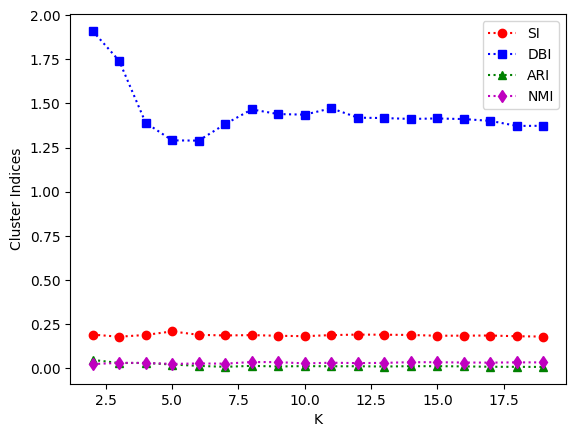

In [2312]:

from sklearn import metrics
from sklearn.cluster import KMeans

# Set possible values for K
k_vals=range(2,20)

# Empty arrays for internal measures
sShil_max = np.empty([len(k_vals),1])
sDaBo_min = np.empty_like(sShil_max)
rndAdj_max = np.empty_like(sShil_max)
nmi_max = np.empty_like(sShil_max)


for i,n in enumerate(k_vals):
    kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(X_train)
    sShil_max[i] = metrics.silhouette_score(X_train,kmeans.labels_)
    sDaBo_min[i] = metrics.davies_bouldin_score(X_train,kmeans.labels_) 
    rndAdj_max[i]= metrics.cluster.adjusted_rand_score(y_train, kmeans.labels_)
    nmi_max[i]=metrics.cluster.normalized_mutual_info_score(y_train, kmeans.labels_)


plt.plot(k_vals, sShil_max, 'o:',c='r')
plt.plot(k_vals, sDaBo_min, 's:',c='b')
plt.plot(k_vals, rndAdj_max, '^:',c='g')
plt.plot(k_vals, nmi_max, 'd:',c='m')
plt.xlabel("K")
plt.ylabel("Cluster Indices")
plt.legend(['SI','DBI','ARI','NMI'])
plt.show()

In [2313]:
kmeans = KMeans(n_clusters=6, max_iter=1000, n_init=10, random_state=0,algorithm = "elkan").fit(X_train)
y_pred=kmeans.predict(X_test)


sShil_max = metrics.silhouette_score(X_test,y_pred)
sDaBo_min = metrics.davies_bouldin_score(X_test,y_pred) 
rndAdj_max= metrics.cluster.adjusted_rand_score(y_test, y_pred)
nmi_max= metrics.cluster.normalized_mutual_info_score(y_test, y_pred)

print(f"The SI is {sShil_max}, DBI score is {sDaBo_min}, ARI score is {rndAdj_max}, and NMI score is {nmi_max}.")

# Note: there is no in general prediction for clustering methods in Sklearn. 
# One can fit classification model using the cluster labels, and then do the prediction.

The SI is 0.19114301828366112, DBI score is 1.2928121617088928, ARI score is 0.01373133781962767, and NMI score is 0.02631231723610603.


c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\omar_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [2314]:
help(kmeans)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several 

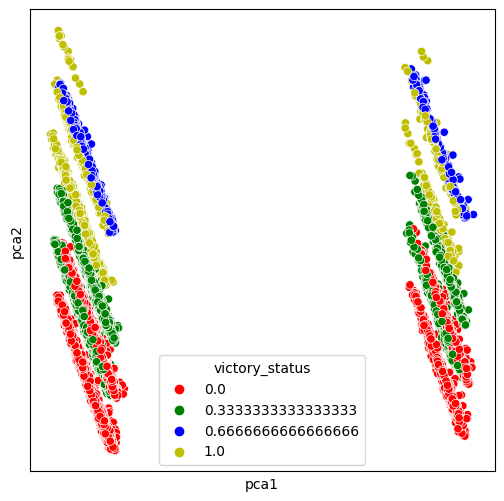

In [2315]:
num_columns = df.select_dtypes(exclude='object').columns

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model


principalComponents = pca.fit_transform(df[num_columns]) # get two components

## # Same as above in two steps
# pca.fit(df[pca_input_columns])
# principalComponents = pca.transform(df[pca_input_columns])

df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]

plt.figure(figsize=(6,6))
sns.scatterplot(x='pca1',y='pca2',
                hue='victory_status',palette=['r','g','b','y'],
                data=df)
plt.xticks([])
plt.yticks([])
plt.show()

In [2317]:
# Let data pass through naive bayes classifier

from sklearn.model_selection import train_test_split

X = df.drop(['winner', 'last_moves_num'], axis=1).values
y = df.loc[:, 'winner'].values
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

display(y_train)
np.unique(y_test, return_counts= True)

array([0. , 0.5, 0.5, ..., 0. , 0.5, 0. ])

(array([0. , 0.5, 1. ]), array([2577, 2753,  248], dtype=int64))

In [2318]:
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

# import matplotlib.pyplot as plt
# plt.figure(figsize =(10,10),dpi=1000)
# tree.plot_tree(dtClf,feature_names=df.columns[:-1].tolist(),class_names=['0','1','2'],filled=True,rounded=True); 
# plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.naive_bayes import GaussianNB

NBClf = GaussianNB()
NBClf.fit(X_train,y_train)

print("Class 1:=", NBClf.classes_[0],"\t Class 2:=", NBClf.classes_[1],"\t Class 3:=", NBClf.classes_[2] )

NB_y_pred = NBClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical Data: \n")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

Class 1:= black 	 Class 2:= draw 	 Class 3:= white
NB for Numerical Data: 

Accuracy:= 0.5553961993546074
Confusion Matrix:= 
 [[1037  245 1295]
 [  65   76  107]
 [ 547  221 1985]]
